In [1]:
import numpy as np
import pandas as pd
import scipy.misc
import sys
import matplotlib.pyplot as plt 
%matplotlib inline

from generator import *

In [4]:
interpolated = pd.read_csv("./data/interpolated.csv", dtype={'angle': np.double, 'torque': np.double, 'speed': np.double})

In [24]:
interpolated_short = interpolated[interpolated.frame_id == 'center_camera'][1:2001]
interpolated_short.to_csv('./data/interpolated_short.csv')

In [6]:
interpolated_left = interpolated_short[interpolated_short.frame_id.str.contains('left')]
interpolated_left.to_csv("./data/interpolated_left.csv")

interpolated_right = interpolated_short[interpolated_short.frame_id.str.contains('right')]
interpolated_right.to_csv("./data/interpolated_right.csv")

interpolated_center = interpolated_short[interpolated_short.frame_id.str.contains('center')]
interpolated_center.to_csv("./data/interpolated_center.csv")

In [26]:
import numpy as np
import pandas as pd
import scipy.misc
import sys

#from generator import *
#sys.path.append('D:/Shared VM Folder/output')

def generate_train_val_splits(direction):
    steerings = pd.read_csv("./data/interpolated_{}.csv".format(direction), dtype={'angle': np.double, 'torque': np.double, 'speed': np.double})
    x = [0]
    prev_ts = 0
    index = 0
    data_slices = []
    for row in steerings.iterrows():
        current_ts = int(row[1]["timestamp"]/1e6)
        delta = current_ts-prev_ts
        prev_ts = current_ts
        if delta > 60:
            #print index, x[-1]
            data_slices.append(steerings[x[-1]:index].reset_index())
            x.append(index)
        index += 1
    data_slices.append(steerings[x[-1]:index].reset_index())
    for ix,d in enumerate(data_slices[1:]):
        l = len(d)
        tr = int(0.9*l)
        print ("Writing sets for driver{} to data/train_val/train_{}_{} and data/train_val/val_{}_{}".format(ix, direction, ix, direction, ix))
        del d['level_0']
        d[:tr].reset_index().to_csv("./data/train_val/train_{}_{}.csv".format(direction, ix), index=False, 
                                    header=True, columns=('index', 'timestamp', 'filename', 
                                                                       'angle', 'torque', 'speed'))
        d[tr:].reset_index().to_csv("./data/train_val/val_{}_{}.csv".format(direction, ix), index=False, 
                                    header=True, columns=('index', 'timestamp', 'filename', 
                                                                       'angle', 'torque', 'speed'))

In [27]:
generate_train_val_splits('center')

Writing sets for driver0 to data/train_val/train_center_0 and data/train_val/val_center_0


In [ ]:
generate_train_val_splits('left')

In [ ]:
generate_train_val_splits('right')

#### Exploring some data

In [2]:
df = pd.read_csv("./data/train_val/train_center_0.csv")

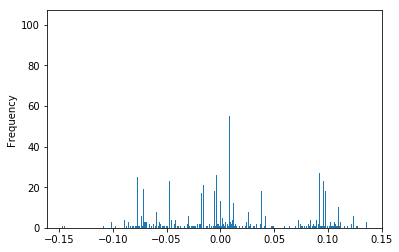

In [3]:
df['angle'].plot('hist', bins=1000)

#### Data Reader

In [2]:
import sys
from generator import DataReader
#sys.path.append("F:\\UIC/Predictive\\Project\\Self_Driving")
sys.path.append("./")

In [3]:
sys.path

['',
 'C:\\Users\\shrey\\Anaconda3\\python36.zip',
 'C:\\Users\\shrey\\Anaconda3\\DLLs',
 'C:\\Users\\shrey\\Anaconda3\\lib',
 'C:\\Users\\shrey\\Anaconda3',
 'C:\\Users\\shrey\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\shrey\\Anaconda3\\lib\\site-packages\\Babel-2.5.0-py3.6.egg',
 'C:\\Users\\shrey\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\shrey\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\shrey\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\shrey\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\shrey\\.ipython',
 './']

In [4]:
dr = DataReader()

In [5]:
#dr.prepare_training()
#dr.prepare_val()

In [6]:
print (dr.num_train)
print (dr.num_val)

1800
200


In [7]:
i,a = dr.load_train_minibatch(10)

In [8]:
len(i)

10

In [9]:
i[1].shape

(480, 640, 3)

In [10]:
a

[[0.00349065847695],
 [0.00349065847695],
 [0.00523598771542],
 [0.00623351662237],
 [0.0142974665448],
 [0.0238374389065],
 [0.033161256462300004],
 [0.0322000511415],
 [0.029587548536],
 [0.0279252678156]]

In [11]:
import keras_model

D:\Shared VM Folder\output\keras_model.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\shrey\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\shrey\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\shrey\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\shrey\Anaconda3\li

In [12]:
%run Keras_Run.py

D:\Shared VM Folder\output\Keras_Run.py:12: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\shrey\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\shrey\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\shrey\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\shrey\Anaconda3\lib

Namespace(augmentation=False, batch_size=64, direction='center', drop_low_angles=False, folds=4, l2reg=0.0, lookahead=False, loss='l2', lr=0.001, mode='concat', num_epochs=2, num_samples=-1, num_workers=4, output='angle', pretrained='None', root_dir='D:/Shared VM Folder/output', save_model='None', steer_correction=0.1, steer_threshold=0.03, train_dir='./', use_gpu=False, val_random=False, window_len=4)
391 312
Training Set:  (1562, 4, 2)
Validation Set (395, 4, 2)
Training Fold:  0 with train_examples:  1171
Training Fold:  0 with val_examples:  391
Epoch 1/2
19/18 [===============================] - 256s 13s/step - loss: 0.6653 - angle_loss: 0.6653 - val_loss: 75.6340 - val_angle_loss: 75.6340
Epoch 2/2
19/18 [===============================] - 243s 13s/step - loss: 0.3154 - angle_loss: 0.3154 - val_loss: 4.2525 - val_angle_loss: 4.2525
Training Fold:  1 with train_examples:  1171
Training Fold:  1 with val_examples:  391
Epoch 1/2
19/18 [===============================] - 259s 14s/st

In [20]:
%run Keras_Run.py

D:\Shared VM Folder\output\Keras_Run.py:12: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\shrey\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\shrey\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\shrey\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\shrey\Anaconda3\lib

Namespace(augmentation=False, batch_size=64, direction='center', drop_low_angles=False, folds=4, l2reg=0.0, lookahead=False, loss='l2', lr=0.001, mode='concat', num_epochs=2, num_samples=-1, num_workers=4, output='angle', pretrained='None', root_dir='D:/Shared VM Folder/output', save_model='None', steer_correction=0.1, steer_threshold=0.03, train_dir='./', use_gpu=False, val_random=False, window_len=4)
391 312
Training Set:  (1562, 4, 2)
Validation Set (395, 4, 2)
Training Fold:  0 with train_examples:  1171
Training Fold:  0 with val_examples:  391
Training Fold:  1 with train_examples:  1171
Training Fold:  1 with val_examples:  391
Training Fold:  2 with train_examples:  1172
Training Fold:  2 with val_examples:  390
Training Fold:  3 with train_examples:  1172
Training Fold:  3 with val_examples:  390
<generator object seq_generator at 0x000002875CED42B0>


NameError: name 'Keras_Run' is not defined